In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
df.duplicated().value_counts()

,count
False,891


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isna().sum()

,0
PassengerId,0
Name,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [ ]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [ ]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Fare"] = df["Fare"].fillna(df["Fare"].mean())

In [ ]:
df.isna().sum()

,0
PassengerId,0
Name,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [ ]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df["Cabin"]=df["Cabin"].fillna(df["Cabin"].mode()[0])

In [ ]:
df.isna().sum()

,0
PassengerId,0
Name,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


In [ ]:
cat_col=df.select_dtypes(include=object)
num_col=df.select_dtypes(include=np.number)

In [ ]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [ ]:
df = pd.get_dummies(df, columns=["Sex"], drop_first=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

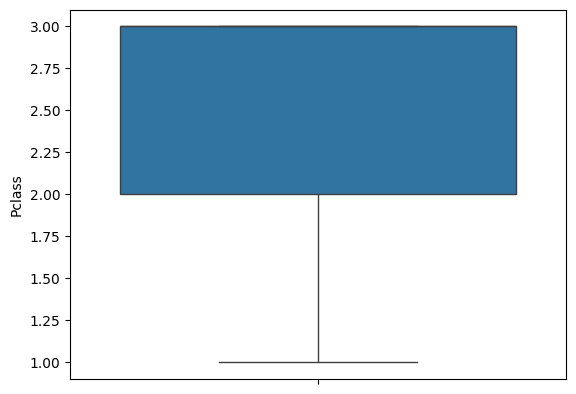

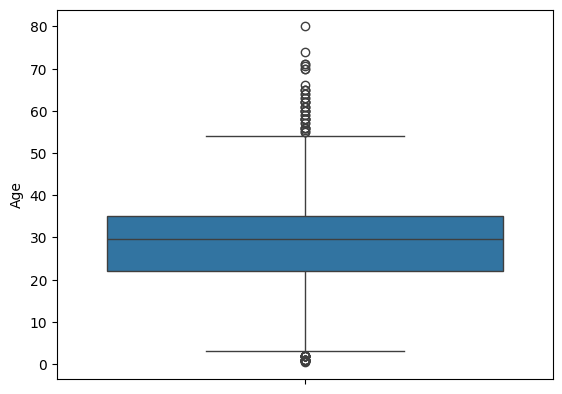

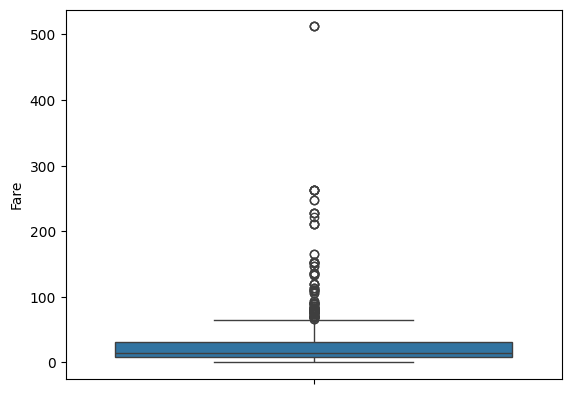

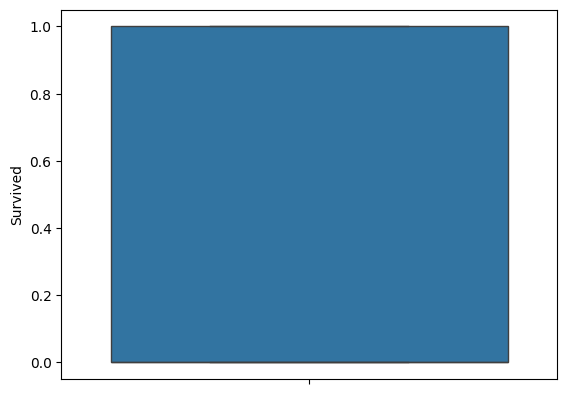

In [ ]:
for col in df.select_dtypes(include=np.number).columns:
  sns.boxplot(df[col])
  plt.show()

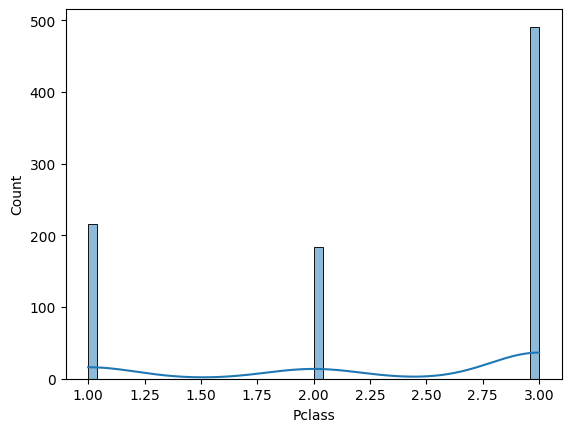

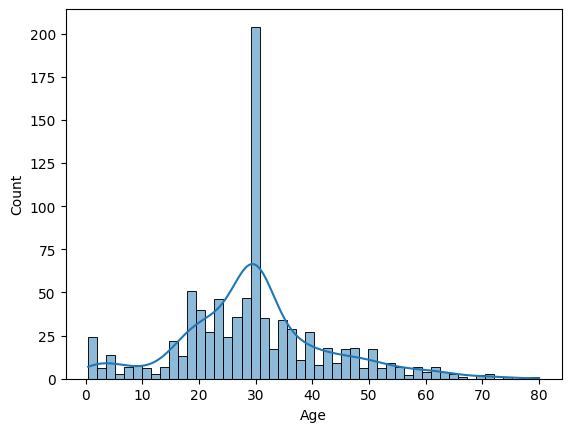

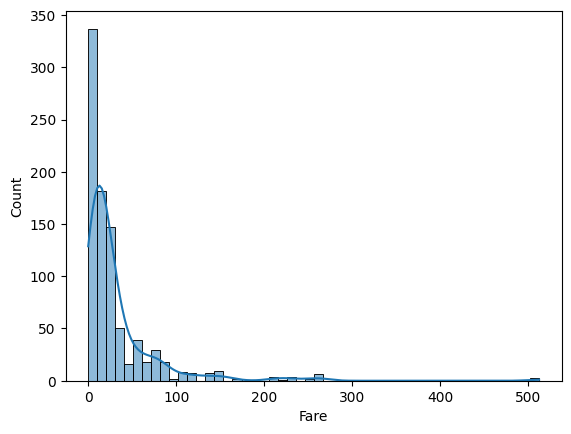

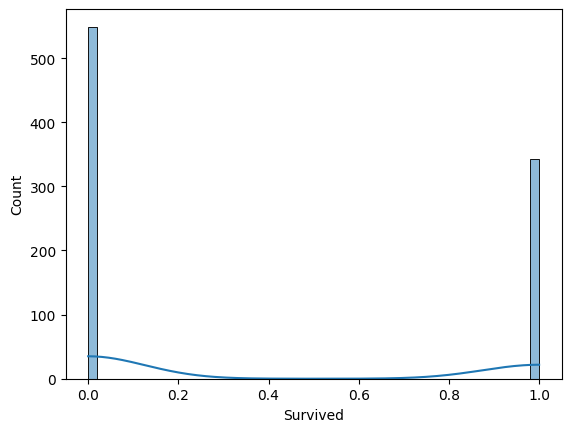

In [ ]:
for col in df.select_dtypes(include=np.number).columns:
  sns.histplot(df[col],bins=50,kde='True')
  plt.show()

In [ ]:
for col in df.select_dtypes(include=object).columns:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(axis='y')
    plt.show()

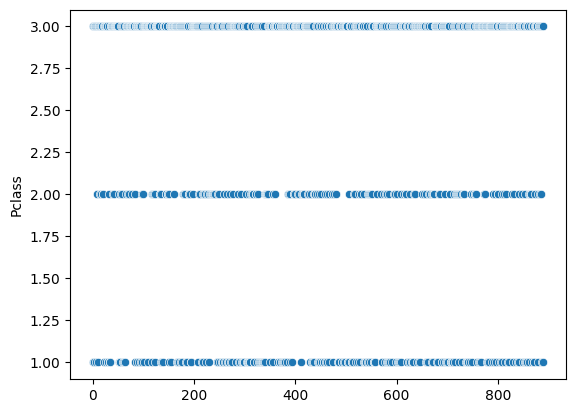

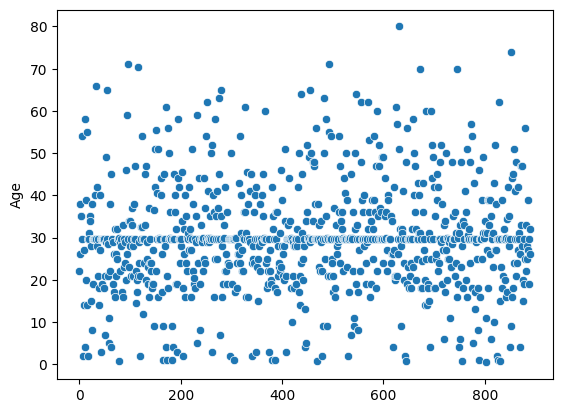

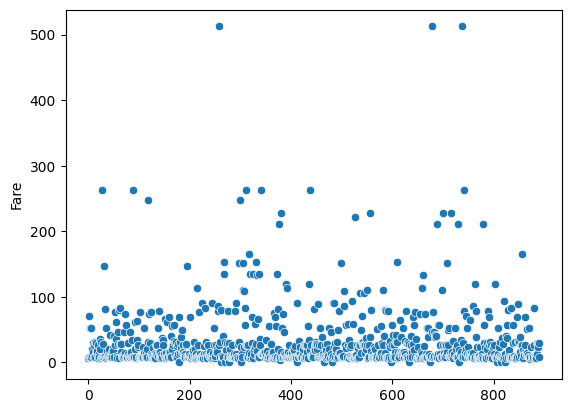

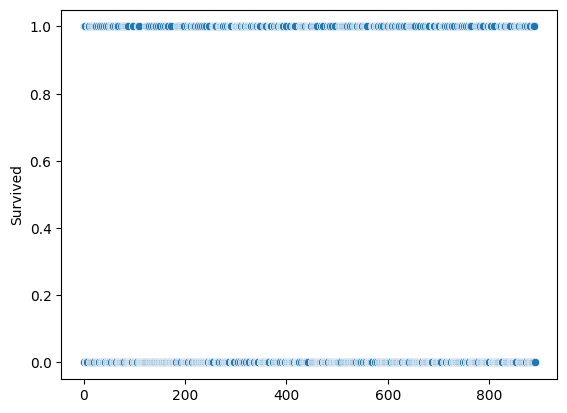

In [ ]:
for col in df.select_dtypes(include=np.number).columns:
  sns.scatterplot(df[col])
  plt.show()

In [ ]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train

,Pclass,Age,Fare,Sex_male
140,3,29.699118,15.2458,False
439,2,31.000000,10.5000,True
817,2,31.000000,37.0042,True
378,3,20.000000,4.0125,True
491,3,21.000000,7.2500,True
...,...,...,...,...
835,1,39.000000,83.1583,False
192,3,19.000000,7.8542,False
629,3,29.699118,7.7333,True
559,3,36.000000,17.4000,False


In [ ]:
x_test

,Pclass,Age,Fare,Sex_male
495,3,29.699118,14.4583,True
648,3,29.699118,7.5500,True
278,3,7.000000,29.1250,True
31,1,29.699118,146.5208,False
255,3,29.000000,15.2458,False
...,...,...,...,...
780,3,13.000000,7.2292,False
837,3,29.699118,8.0500,True
215,1,31.000000,113.2750,False
833,3,23.000000,7.8542,True


In [ ]:
y_train

,Survived
140,0
439,0
817,0
378,0
491,0
...,...
835,1
192,1
629,0
559,1


In [ ]:
y_test

,Survived
495,0
648,0
278,0
31,1
255,1
...,...
780,1
837,0
215,1
833,0


In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)


GaussianNB()

In [ ]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7821229050279329

Confusion Matrix:
 [[87 23]
 [16 53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.82       110
           1       0.70      0.77      0.73        69

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.79      0.78      0.78       179



In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv("Social_Network_Ads.csv")

In [ ]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
data.duplicated().value_counts()

,count
False,367
True,33


In [ ]:
data.isna().sum()

,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [ ]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [ ]:
x=data.drop('Purchased',axis=1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

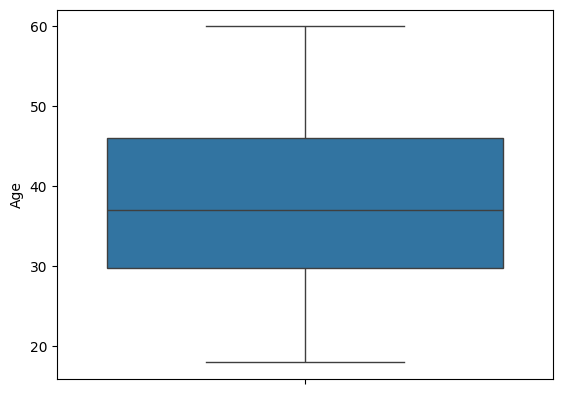

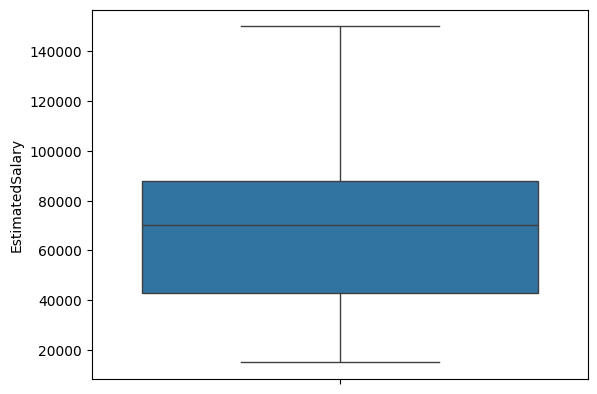

In [ ]:
for i in x:
  sns.boxplot(data[i])
  plt.show()

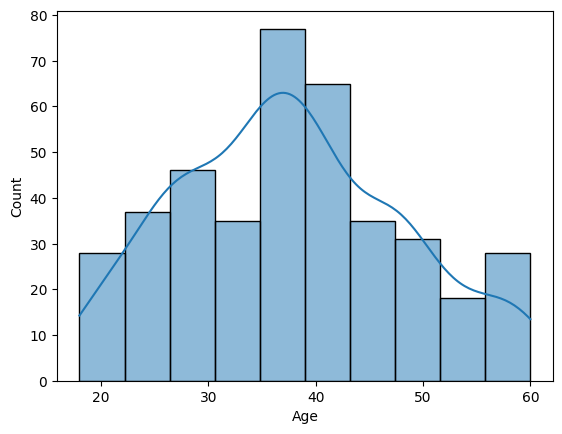

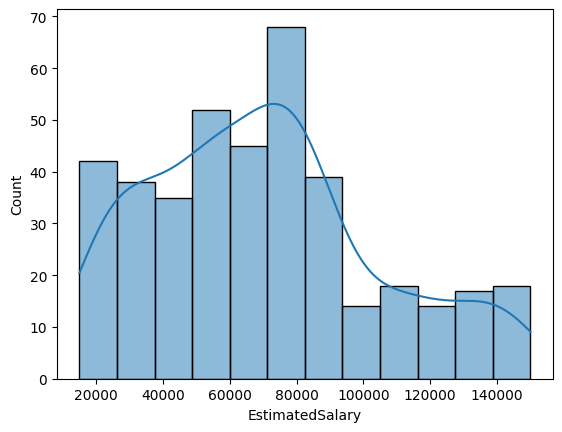

In [ ]:
for i in x:
  sns.histplot(data[i],kde=True)
  plt.show()

<Axes: >

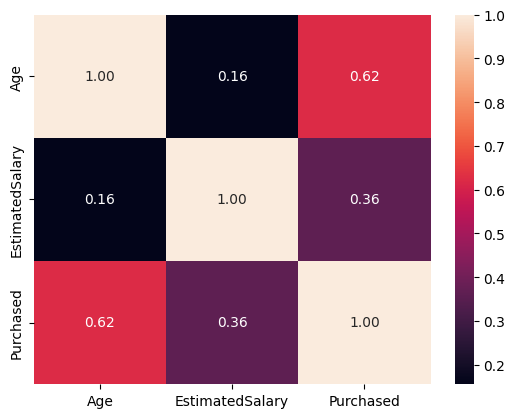

In [ ]:
sns.heatmap(data.corr(),annot=True,fmt='.2f')

In [ ]:
y=data['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train

,Age,EstimatedSalary
336,58,144000
64,59,83000
55,24,55000
106,26,35000
300,58,38000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [ ]:
x_test

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
14,18,82000
363,42,79000
304,40,60000
361,53,34000


In [ ]:
y_train

,Purchased
336,1
64,0
55,0
106,0
300,1
...,...
323,1
192,0
117,0
47,0


In [ ]:
y_test

,Purchased
132,0
309,0
341,0
196,0
246,0
...,...
14,0
363,0
304,0
361,1


In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
model=GaussianNB()
model.fit(x_train,y_train)


GaussianNB()

In [ ]:
model.score(x_train,y_train)

0.878125

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.925

Confusion Matrix:
 [[56  2]
 [ 4 18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        58
           1       0.90      0.82      0.86        22

    accuracy                           0.93        80
   macro avg       0.92      0.89      0.90        80
weighted avg       0.92      0.93      0.92        80



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data1=pd.read_csv("User_Data.csv")
data1.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data1.shape

(400, 5)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
data1.duplicated().value_counts()

,count
False,400


In [ ]:
data1.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
data1.isna().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

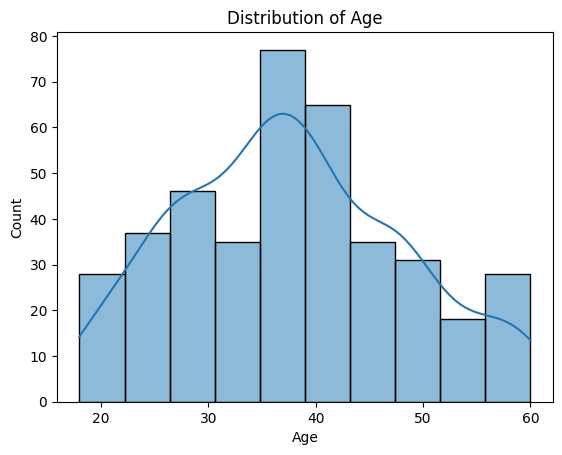

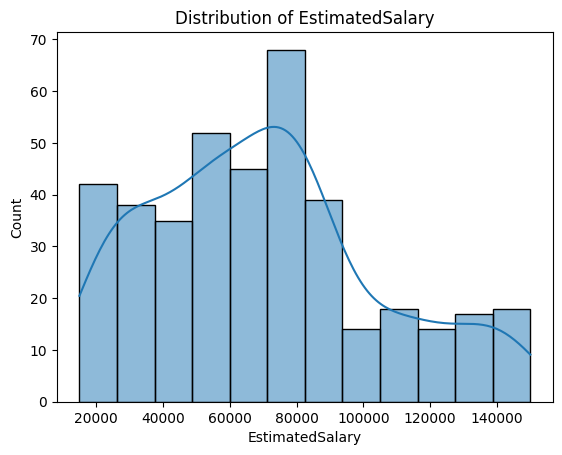

In [ ]:
for col in ['Age', 'EstimatedSalary']:
    plt.figure()
    sns.histplot(data1[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [ ]:
data1['Gender'] = data1['Gender'].map({'Male':1, 'Female':0})

In [ ]:
data1 = data1.drop(['User ID'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

x = data1.drop('Purchased', axis=1)
y = data1['Purchased']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
x_train

,Gender,Age,EstimatedSalary
3,0,27,57000
18,1,46,28000
202,0,39,134000
250,0,44,39000
274,0,57,26000
...,...,...,...
71,0,24,27000
106,0,26,35000
270,0,43,133000
348,1,39,77000


In [ ]:
x_test

,Gender,Age,EstimatedSalary
209,0,46,22000
280,0,59,88000
33,0,28,44000
210,0,48,96000
93,0,29,28000
...,...,...,...
246,0,35,50000
227,1,56,133000
369,0,54,26000
176,0,35,47000


In [ ]:
y_train

,Purchased
3,0
18,1
202,1
250,0
274,1
...,...
71,0
106,0
270,0
348,0


In [ ]:
y_test

,Purchased
209,0
280,1
33,0
210,1
93,0
...,...
246,0
227,1
369,1
176,0


In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [ ]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
model.score(x_train,y_train)

0.8625

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9375

Confusion Matrix:
 [[50  2]
 [ 3 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df1=pd.read_csv("adultdata.csv")
df1.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
df1.shape

(32560, 15)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df1.duplicated().value_counts()

,count
False,32536
True,24


In [ ]:
df1.drop_duplicates(inplace=True)

In [ ]:
df1.duplicated().value_counts()

,count
False,32536


In [ ]:
df1.isna().sum()

,0
39,0
State-gov,0
77516,0
Bachelors,0
13,0
Never-married,0
Adm-clerical,0
Not-in-family,0
White,0
Male,0


In [ ]:
cat_cols = df1.select_dtypes(include='object').columns
cat_cols


Index([' State-gov', ' Bachelors', ' Never-married', ' Adm-clerical',
       ' Not-in-family', ' White', ' Male', ' United-States', ' <=50K'],
      dtype='object')

In [ ]:
df1 = pd.get_dummies(df1, columns=cat_cols, drop_first=True)

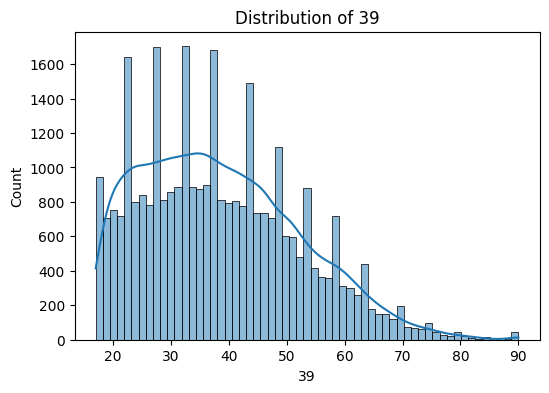

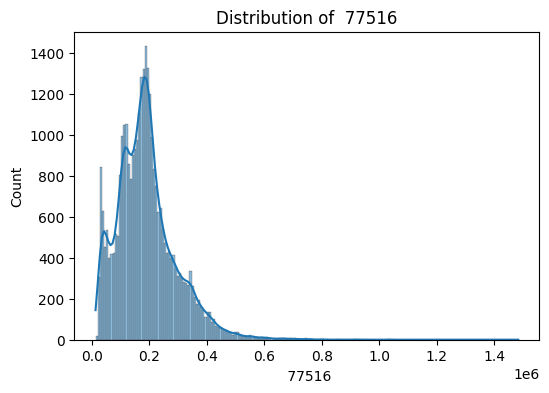

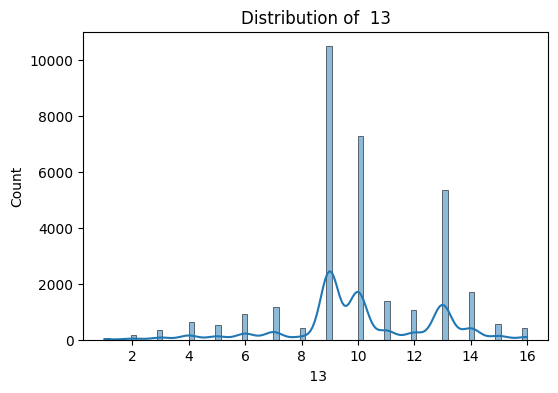

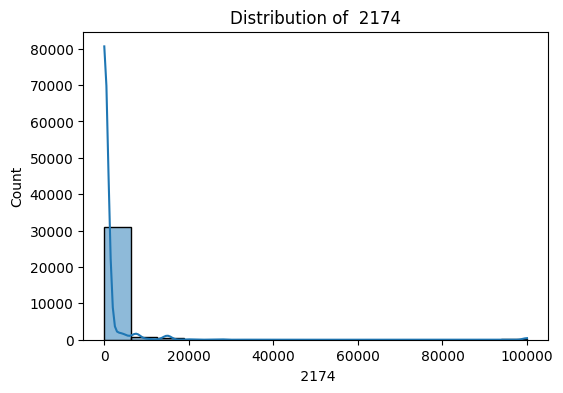

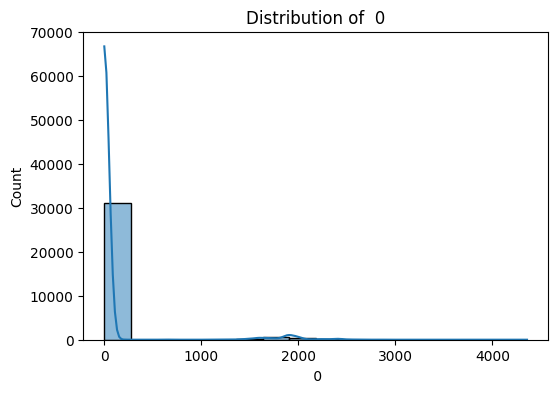

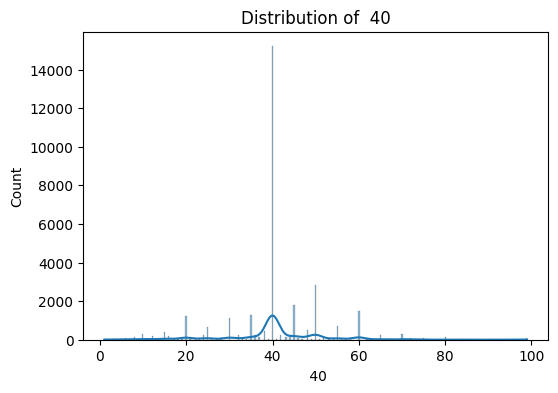

In [ ]:
num_cols = df1.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df1[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [ ]:
x = df1.drop(' <=50K_ >50K', axis=1)
y = df1[' <=50K_ >50K']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train

,39,77516,13,2174,0,40,State-gov_ Federal-gov,State-gov_ Local-gov,State-gov_ Never-worked,State-gov_ Private,...,United-States_ Portugal,United-States_ Puerto-Rico,United-States_ Scotland,United-States_ South,United-States_ Taiwan,United-States_ Thailand,United-States_ Trinadad&Tobago,United-States_ United-States,United-States_ Vietnam,United-States_ Yugoslavia
27636,39,115289,12,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
18823,25,75821,10,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
21940,24,165474,9,0,0,39,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
7881,28,138054,12,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4891,23,218215,12,0,0,35,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13128,49,200949,6,0,0,38,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
19657,24,183751,7,0,0,65,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
9848,18,120691,10,0,0,35,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
10802,34,176711,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
y_train

,<=50K_ >50K
27636,True
18823,False
21940,False
7881,False
4891,False
...,...
13128,False
19657,False
9848,False
10802,False


In [ ]:
x_test

,39,77516,13,2174,0,40,State-gov_ Federal-gov,State-gov_ Local-gov,State-gov_ Never-worked,State-gov_ Private,...,United-States_ Portugal,United-States_ Puerto-Rico,United-States_ Scotland,United-States_ South,United-States_ Taiwan,United-States_ Thailand,United-States_ Trinadad&Tobago,United-States_ United-States,United-States_ Vietnam,United-States_ Yugoslavia
24187,50,167886,10,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
26470,25,33610,9,0,0,45,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
26842,47,239865,9,0,1977,45,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
8795,39,70995,13,15024,0,99,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
27177,34,226883,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12362,37,249392,11,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1043,24,34446,10,0,0,37,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
30860,26,134945,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
12691,48,102076,13,0,0,35,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
y_test

,<=50K_ >50K
24187,True
26470,False
26842,True
8795,True
27177,False
...,...
12362,True
1043,False
30860,False
12691,False


In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [ ]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
model.score(x_train,y_train)

0.7959889349930843

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([False, False,  True, ..., False, False,  True])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7931776275353412

Confusion Matrix:
 [[4698  262]
 [1084  464]]

Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.95      0.87      4960
        True       0.64      0.30      0.41      1548

    accuracy                           0.79      6508
   macro avg       0.73      0.62      0.64      6508
weighted avg       0.77      0.79      0.76      6508

